# SYDE 361: System Identification Assignment
### Spring 2023 

Student ID #: [insert ID number here]

### Instructions 
- Complete missing cells (i.e. where it says '\# Your answer here')
- Run all cells to make sure there are no errors 
- Save as html and submit both .html and .ipynb files to dropbox with filename: SYDE361-A1-student#

### Contents
0. Useful tools 
1. Obtaining position data
2. Solar Energy [12 marks]
3. Conversion Potential [10 marks]
4. Solar cell alignment [13 marks]
5. Bonus [3 marks bonus]

*Grading out of 35*

### Load the sun position function

In [1]:
%run sun.py

# 1. Obtaining position data
By default, the **sunPosition()** function will return values for: \
Latitude = 43.5 and Longitude = -80.5 \
These are the coordinates for Waterloo, ON

### 1.1 Hourly increments

In [2]:
#only hours
time_zone = 4 # GMT -4 is EDT, so add 4 hrs 
hrs = np.arange(0+time_zone,24+time_zone)
year = 2023
month = 5
day = 20
pos = np.array([sunPosition(2023,6,10,hr) for hr in hrs])
pos.shape

(24, 2)

This is an array of 24 values (each hour of day) with azimuth and elevation at each time-point.

**Elevation**: Angle of elevation of sun from horizon (degrees).

**Azimuth**: Compass orientation of sun, where North is 0 degrees. 



### Plotting Elevation and Azimuth separately

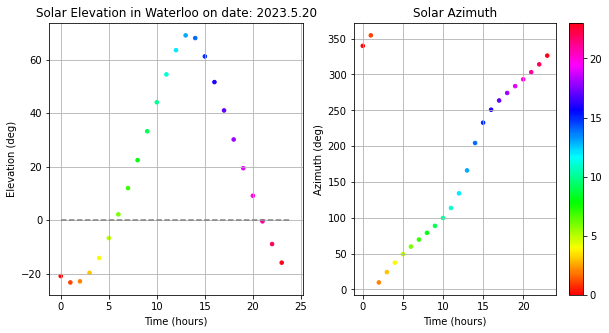

In [3]:
# Decide figure size, width X height in inches
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)

time = np.arange(0,24)

plt.scatter(time,pos[:,1], marker= '.',linestyle='-',s = 50,c = time,cmap=cm.hsv)
plt.grid()
# plot horizon
plt.hlines(y=0,xmin=0,xmax=24,linestyle='--',color='gray')
plt.xlabel('Time (hours)')
plt.ylabel('Elevation (deg)')
plt.title('Solar Elevation in Waterloo on date: ' + str(year) +  '.' +  str(month) + '.' + str(day))

plt.subplot(1,2,2)
plt.grid()
plt.scatter(time,pos[:,0], marker= '.',s = 50,c = time,cmap=cm.hsv)
plt.xlabel('Time (hours)')
plt.ylabel('Azimuth (deg)')
plt.title('Solar Azimuth')
plt.colorbar()
plt.show()

### Plotting Elevation against Azimuth 

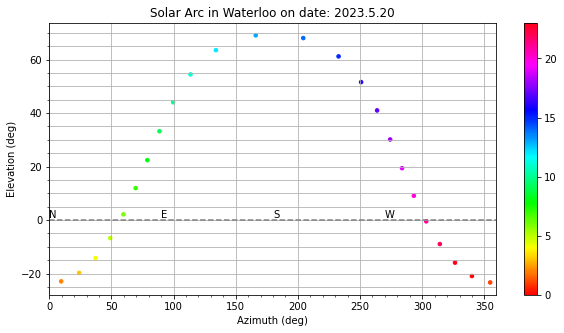

In [4]:
# Decide figure size, width X height in inches
plt.figure(figsize=[10,5])

plt.scatter(pos[:,0],pos[:,1], marker= '.',s = 50,c = time,cmap=cm.hsv)
plt.text(0,1,"N")
plt.text(90,1,"E")
plt.text(180,1,"S")
plt.text(270,1,"W")
plt.xlim(0,359)
#plt.ylim(0,np.max(np.array(pos)[:,1])+5) # remove values below zero (only sunrise to sunset)
# plot horizon
plt.hlines(y=0,xmin=0,xmax=359,linestyle='--',color='gray')
plt.minorticks_on()
plt.grid(which='both',axis='y')
plt.grid(which='major',axis='x')
plt.xlabel('Azimuth (deg)')
plt.ylabel('Elevation (deg)')
plt.title('Solar Arc in Waterloo on date: ' + str(year) +  '.' +  str(month) + '.' + str(day))
plt.colorbar()
plt.show()

### 1.2 In Minute Increments 

In [5]:
mins = np.arange(0,60)
#hours and mins 
pos = np.array([sunPosition(2023,6,10,hr,mn) 
                for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))])

### Plotting

Time of day is shown by marker color here. We will create a time variable that follows the form used in the list comprehension above:

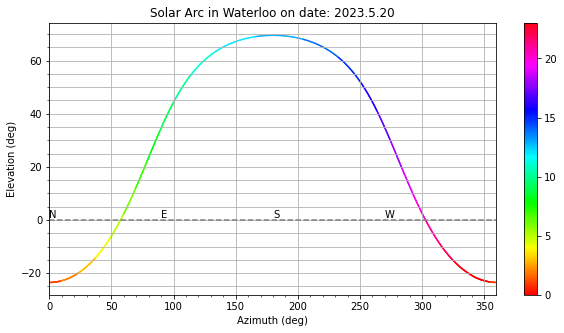

In [6]:
# hours including fractions of hours 
time = np.repeat(np.arange(0,24),60) + np.tile(np.arange(0,60),24)*1/60
# hours only
time = np.repeat(np.arange(0,24),60) 

plt.figure(figsize=[10,5])
plt.scatter((pos[:,0]),pos[:,1], marker= '.',s = 1,c = time,cmap=cm.hsv)
plt.text(0,1,"N")
plt.text(90,1,"E")
plt.text(180,1,"S")
plt.text(270,1,"W")
plt.xlim(0,359)
#plt.ylim(0,np.max(np.array(pos)[:,1])+5) # remove values below zero (only sunrise to sunset)
# plot horizon
plt.hlines(y=0,xmin=0,xmax=359,linestyle='--',color='gray')
plt.minorticks_on()
plt.grid(which='both',axis='y')
plt.grid(which='major',axis='x')
plt.xlabel('Azimuth (deg)')
plt.ylabel('Elevation (deg)')
plt.title('Solar Arc in Waterloo on date: ' + str(year) +  '.' +  str(month) + '.' + str(day))
# add legend if you include the label argument in the plot function
#plt.legend()
plt.colorbar()
plt.show()

### 1.3 Another Geographic Location

In [7]:
lat = -33
long = -70

time_zone =4 # GMT -4
hrs = np.arange(0+time_zone,24+time_zone)
#hrs = np.arange(0,24)

#hours and mins 
pos = np.array([sunPosition(2023,6,10,hr,mn,lat=lat,long=long) 
                for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))])

### Plotting

Can use vertical lines (**vlines**) to indicate important times along with the color (**c**) of the points

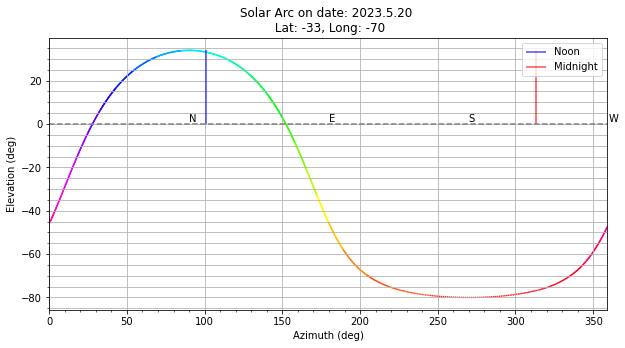

In [8]:
shift = 90 # shifting all x values for clarity of plot
plt.figure(figsize=[10,5])
plt.scatter((pos[:,0]+shift)%360,pos[:,1], marker= '.',s = 1,c = time,cmap=cm.hsv)

# NOON: this is the middle value of the azimuth array, so we can acccess it as follows
plt.vlines((pos[:,0][int(pos[:,0].shape[0]/2)]+shift)%360,
           ymin=0,ymax=max(pos[:,1]),color='blue',alpha=0.7,label='Noon')
# MIDNIGHT: this is the middle value of the azimuth array, so we can acccess it as follows
plt.vlines((pos[:,0][0]+shift)%360,
           ymin=0,ymax=max(pos[:,1]),color='red',alpha = 0.7,label='Midnight')
plt.text(0+shift,1,"N")
plt.text(90+shift,1,"E")
plt.text(180+shift,1,"S")
plt.text(270+shift,1,"W")
plt.xlim(0,359)

# plot horizon
plt.hlines(y=0,xmin=0,xmax=359,linestyle='--',color='gray')
#plt.ylim(0,np.max(np.array(pos)[:,1])+5) # remove values below zero (only sunrise to sunset)
plt.minorticks_on()
plt.grid(which='both',axis='y')
plt.grid(which='major',axis='x')
plt.xlabel('Azimuth (deg)')
plt.ylabel('Elevation (deg)')
plt.title('Solar Arc on date: ' + str(year) +  '.' +  str(month) +
              '.' + str(day) + ' \n Lat: ' + str(lat) + ', Long: ' + str(long))
plt.legend()
plt.show()

### 1.3 Multiple Dates

Now we will show only daylight hours by setting the y-axis limits

In [9]:
months = [7,8,9,10,11,12]
#multiple days 
pos = [np.array([sunPosition(2023,month,1,hr,mn) 
                for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))]) 
                for month in months]
print(str(len(pos)) + ' Months')
pos[0].shape

6 Months


(1440, 2)

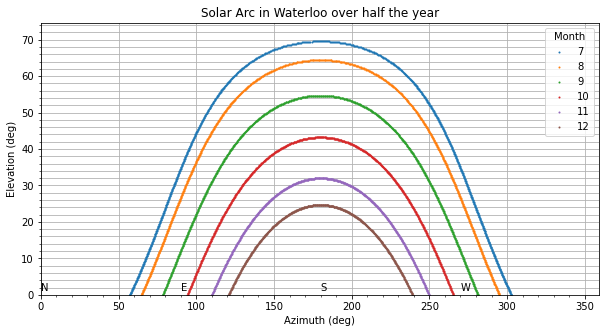

In [10]:
shift = 0
plt.figure(figsize=[10,5])
for i in range(0,len(months)):
    plt.plot((pos[i][:,0]+shift)%360,pos[i][:,1], '.',markersize=2,label=months[i])
plt.text(0+shift,1,"N")
plt.text(90+shift,1,"E")
plt.text(180+shift,1,"S")
plt.text(270+shift,1,"W")
plt.xlim(0,359)
plt.ylim(0,np.max(np.array(pos)[:,:,1])+5) # remove values below zero (only sunrise to sunset)
plt.xlabel('Azimuth (deg)')
plt.ylabel('Elevation (deg)')
plt.title('Solar Arc in Waterloo over half the year')
plt.minorticks_on()
plt.grid(which='both',axis='y')
plt.grid(which='major',axis='x')
# Adding legend, which shows "label" argument of plot
plt.legend(title='Month')
plt.show()

# 2. Solar energy

The amount of solar energy incident on a surface perpendicular to the sun is composed of two components, direct and diffuse light. Direct irradiation on a clear day, $I_d$, is given by the following empirical model [2]: 

$ I_d = 1,353 \cdot 0.7^{AM^{0.678}} $ [Watt/$m^2$]

And Air Mass, $AM$, which is the length of atmostphere the light must pass through, is related to the elevation angle, $\theta$ of the sun. It can be approximated as: 

$ AM = \frac{1}{\cos(90 - \theta)}$

### Effect of weather conditions 

The diffuse component of irraiance can be estimated as 10% of the direct component on a clear day, so that total available energy is: 

$ I_t = I_d + I_{diffuse} \\ \quad \approx 1.1 \cdot I_d $

This represents the theoretical maximum yield. We will work with this value but bear in mind cloud cover will reduce the total irradiance (though the diffuse contribution will be greater). 

### 2.1 [2 marks] Implement a function to estimate total irradiance (clear conditions) from elevation angle.

In [11]:
# SOLUTION

def I_t(el):
    # negative elevation not meaningful
    el2 = el.copy()
    el2[el2<0] = 0
    AM = 1/np.cos(np.radians(90-el2))
    I = 1.1*(1353*0.7**AM**0.678)
    return I

### 2.2 [3 marks]: 
### Generate a single plot showing $I_t$ on both June 1st and January 1st in Waterloo, ON. 

- Use time for x axis 
- Use a legend to label each line
- Use appropriate units. 

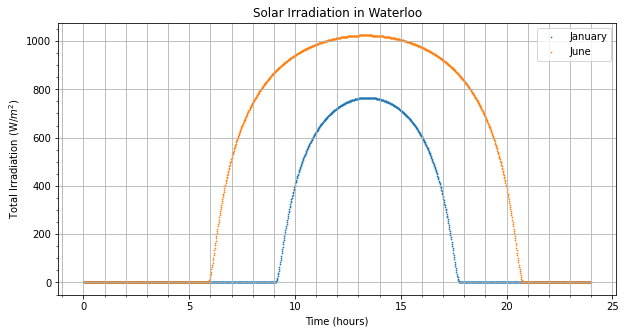

In [12]:
# SOLUTION

# time zone GMT-4 in summer ... can ignore daylight savings time-- not important.
time_zone = 4
hrs = np.arange(0+time_zone,24+time_zone)
mins = np.arange(0,60)


Wjan = np.array([sunPosition(2023,1,1,hr,mn) 
                for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))])
Wjun = np.array([sunPosition(2023,6,1,hr,mn) 
                for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))])

# hours including fractions of hours 
time = np.repeat(np.arange(0,24),60) + np.tile(np.arange(0,60),24)*1/60

plt.figure(figsize=[10,5])
plt.scatter(time,I_t(Wjan[:,1]), marker= '.',s = 2,label='January')
plt.scatter(time,I_t(Wjun[:,1]), marker= '.',s = 2,label='June')
plt.minorticks_on()
plt.grid(which='major',axis='y')
plt.grid(which='both',axis='x')
plt.xlabel('Time (hours)')
plt.ylabel('Total Irradiation (W/$m^2$)')
plt.title('Solar Irradiation in Waterloo')
plt.legend()
plt.show()

### 2.3 [5 marks]: 
### Generate a single plot showing $I_t$ on both June 1st and January 1st in Yellowknife, NWT. 

- Use time for x axis 
- Use a legend to label each line
- Use appropriate units. 

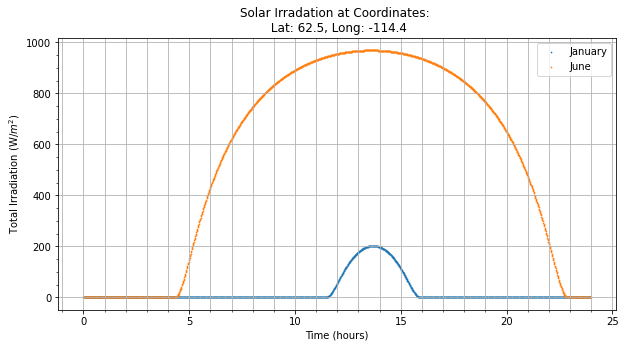

In [13]:
# SOLUTION

# time zone GMT-6
time_zone = 6 
hrs = np.arange(0+time_zone,24+time_zone)
mins = np.arange(0,60)
lat = 62.5
long = -114.4

# hours including fractions of hours 
time = np.repeat(np.arange(0,24),60) + np.tile(np.arange(0,60),24)*1/60


Yjan = np.array([sunPosition(2023,1,1,hr,mn,lat=lat,long=long) 
                for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))])
Yjun = np.array([sunPosition(2023,6,1,hr,mn,lat=lat,long=long) 
                for hr,mn in zip(np.repeat(hrs,60),np.tile(mins,24))])


plt.figure(figsize=[10,5])
plt.scatter(time,I_t(Yjan[:,1]), marker= '.',s = 2, label='January')
plt.scatter(time,I_t(Yjun[:,1]), marker= '.',s = 2, label='June')
plt.xlabel('Time (hours)')
plt.ylabel('Total Irradiation (W/$m^2$)')
plt.title('Solar Irradation at Coordinates: ' + '\n Lat: ' + str(lat) + ', Long: ' + str(long))
plt.minorticks_on()
plt.grid(which='major',axis='y')
plt.grid(which='both',axis='x')
plt.legend()
plt.show()

## 2.4 [2 Marks]: Implement a function to calculate daily total energy on a unit ($m^2$) surface. 
### Use it to fill in the table below comparing Waterloo and Yellowknife.

In [14]:
# SOLUTION

def I_day(el,dx = 1/60):
    return round(np.trapz(I_t(el),dx=dx))

print('Daily Irradiation (Watt-hour per m^2)')
pd.DataFrame(columns=['Waterloo','Yellowknife'],
             index=['Jan','June'],
             data=[[I_day(Wjan[:,1]),I_day(Yjan[:,1])],
                   [I_day(Wjun[:,1]),I_day(Yjun[:,1])]])

Daily Irradiation (Watt-hour per m^2)


,Waterloo,Yellowknife
Jan,4942,542
June,11971,13231


# 3. Conversion Potential 

We can estimate current solar cell efficiency, $E_{PV}$ to be about 20% of the energy incident on the collector. 

$ E_{PV} \approx 0.2 \cdot I_t $ [W/$m^2$]

Considering this efficiency factor: 

## 3.1 [3 Marks]: 
## Implement a function that estimates current output for a solar panel of area $A$ in $cm^2$.
- Use elevation angle and panel area (A) as inputs
- Assume a working voltage of 5V
- Assume the angle of incidence between the light and surface normal is 0, i.e. perpendicular. 

In [15]:
# SOLUTION

# returns milliamps, area in cm^2 
def current(el, area):
    a_m2 = area/10000
    power = I_t(el)*a_m2*0.2 # energy/area * area * efficiency
    current = power/5 #volts
    return current*1000

## 3.2 [5 Marks]: Plot the theoretical current output in Waterloo on January 1st and Jun 1st
- Assume a panel size of 25 cm^2
- Plot time on the x-axis
- Include total daily current output (Amp-hours) in legend
- Use appropriate units and labels

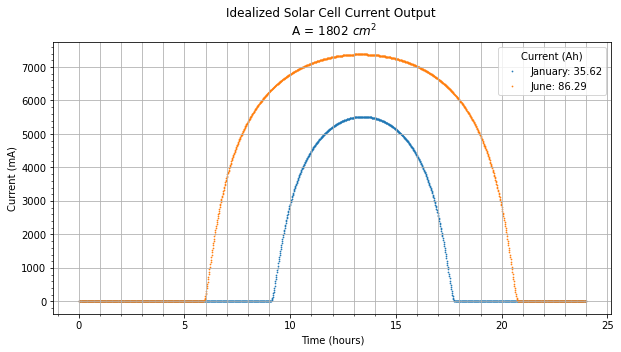

In [16]:
# SOLUTION 

A = 1802 # cm2 

#mAh 
jan = round(I_day(Wjan[:,1])*A/10000*0.2/5,2)
jun = round(I_day(Wjun[:,1])*A/10000*0.2/5,2)

# hours including fractions of hours 
time = np.repeat(np.arange(0,24),60) + np.tile(np.arange(0,60),24)*1/60

plt.figure(figsize=[10,5])
plt.scatter(time,current(Wjan[:,1],A), marker= '.',s = 2,label='January: '+ str(jan))
plt.scatter(time,current(Wjun[:,1],A), marker= '.',s = 2,label='June: ' + str(jun))
plt.minorticks_on()
plt.grid(which='major',axis='y')
plt.grid(which='both',axis='x')
plt.xlabel('Time (hours)')
plt.ylabel('Current (mA)')
plt.title('Idealized Solar Cell Current Output \n A = ' + str(A) + ' $cm^2$')
plt.legend(title='Current (Ah)')
plt.show()

## 3.3 [2 Marks]
 Consider a use-case where clear-sky current output must be above 60 mA. Provide an accurate estimate of the length of time (in hours) this solar cell size would be useful for these two dates.

In [17]:
# SOLUTION 

half = int(current(Wjan[:,1],A).shape[0]/2)

for i,j in enumerate(current(Wjan[:,1],A)):
    if j>60:
        a = i
        break
for i,j in enumerate(current(Wjan[:,1],A)[half:]):
    if j<60:
        b = i+half
        break
dur_jan = (b-a)/60

for i,j in enumerate(current(Wjun[:,1],A)):
    if j>60:
        a = i
        break
for i,j in enumerate(current(Wjun[:,1],A)[half:]):
    if j<60:
        b = i+half
        break
dur_jun = (b-a)/60

print('Jan:')
print(dur_jan)
print('Jun:')
print(dur_jun)


Jan:
8.6
Jun:
14.783333333333333


# 4. Solar panel alignment

Up to now we have been calculating energy yields assuming no misalignment between the solar panel and light source. Now we will consider the effect of misalignment. 

## 4.1 Fixed configuration 

Consider a panel with a south-facing azimuth ($\gamma = 180$) fixed at an angle $\beta$ from the horizontal. Its normal vector will be oriented $90 - \beta$ degrees into the sky from the horizontal. 

The angle of incidence, $\theta$ between sunlight and the panel's normal vector is given by the following relation (eq. 5 as reviewed by NREL [3]): 

$ \cos(\theta) = \cos(\beta)\cos(\theta_z) + \sin(\beta)\sin(\theta_z)\cos(\gamma_s-\gamma) $

Where: 
- $\theta_z$: zenith angle of sun (= 90 - elevation) 
- $\gamma_s$: azimuth of sun

In the summer, fixed solar panels are recommended to have a tilt angle of the site's latitude minus 15 degrees. In the winter, it is latitude plus 15 degrees. This adjustment value comes from the Earth's axial tilt. At the exact solstaces, the ideal angle will be latitude +/- 23.5 (the exact axial tilt of the Earth).  

## [2 marks] Using this equation, show the optimal tilt angle $\beta$ for June 1st and January 1st by plotting a few angles around the theoretical optimal value

Hint for showing only daylight hours : 
- You can hide values of an array (here: x) based on some condition of another array (e.g. y) of the same length: 
- x[y > 0] will only include elements in x where the corresponding one in y is greater than zero. 

In [18]:
# SOLUTION

# computes the incidence angle above 
# el and az can be arrays (as function of time)
def inc_ang(beta, panel_az, el, az):
    
    beta = np.radians(beta)
    panel_az = np.radians(panel_az)
    zen = np.radians(90 - el)
    azrad = np.radians(az)
    
    arg = np.cos(beta)*np.cos(zen)+ \
            np.sin(beta)*np.sin(zen)*np.cos(azrad-panel_az)
    deg = np.degrees(np.arccos(arg))
    
    # max value is 90, means output is zero 
    deg[deg>90] = 90
    
    return deg

beta = np.arange(10,80,10) # deg
panel_az = 180 # deg 

theta = [inc_ang(b, panel_az, Wjan[:,1],Wjan[:,0]) for b in beta]
theta2 = [inc_ang(b, panel_az, Wjun[:,1],Wjun[:,0]) for b in beta]



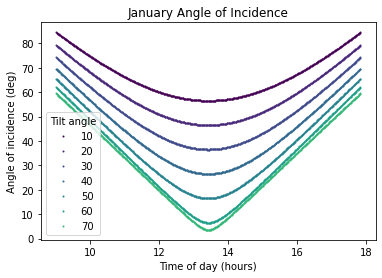

In [19]:
# SOLUTION 
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,10)))
for i in range(0,len(beta)):
    plt.scatter(time[Wjan[:,1]>0],theta[i][Wjan[:,1]>0],linestyle='-',
                label=beta[i],s=1)
plt.legend()
plt.title('January Angle of Incidence')
plt.ylabel('Angle of incidence (deg)')
plt.xlabel('Time of day (hours)')
plt.legend(title='Tilt angle')
plt.show()

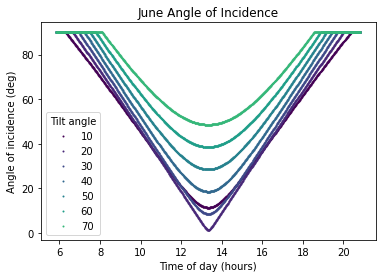

In [20]:
# SOLUTION

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,10)))
for i in range(0,len(beta)):
    plt.scatter(time[Wjun[:,1]>0],theta2[i][Wjun[:,1]>0],linestyle='-',
                label=beta[i],s=1)
plt.legend()
plt.title('June Angle of Incidence')
plt.ylabel('Angle of incidence (deg)')
plt.xlabel('Time of day (hours)')
plt.legend(title='Tilt angle')
plt.show()

## 4.2 Fixed panel output 

When the angle of incidence, $\theta$ is non-zero, the actual energy on the surface can be estimated as: 

$ E = E_{pv} \cdot \cos(\theta) $

## [3 marks] Use this relation to estimate the current output as a function of time for a fixed panel on June 1st (from *Section 3.2*)

- Use a tilt angle of 20 degrees
- Area of 25 cm^2
- Also include the ideal curve (angle of incidence always zero)

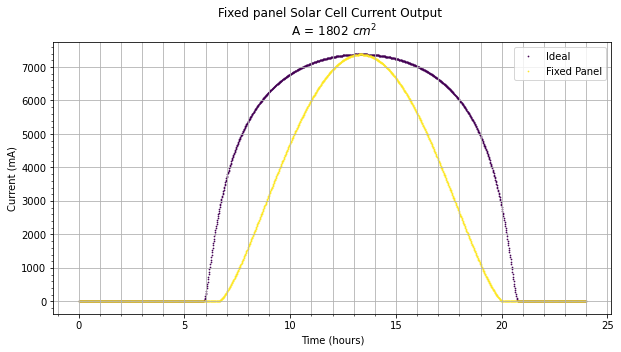

In [22]:
# SOLUTION 

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,2)))


A = 1802 # cm2 
beta = 20 #degrees

# hours including fractions of hours 
time = np.repeat(np.arange(0,24),60) + np.tile(np.arange(0,60),24)*1/60

cos_theta = np.cos(np.radians(inc_ang(beta, panel_az, Wjun[:,1],Wjun[:,0])))

plt.figure(figsize=[10,5])
plt.scatter(time,current(Wjun[:,1],A), marker= '.',s = 2,label='Ideal')
plt.scatter(time,current(Wjun[:,1],A)*cos_theta, marker= '.',s = 2,label='Fixed Panel')
plt.minorticks_on()
plt.grid(which='major',axis='y')
plt.grid(which='both',axis='x')
plt.xlabel('Time (hours)')
plt.ylabel('Current (mA)')
plt.title('Fixed panel Solar Cell Current Output \n A = ' + str(A) + ' $cm^2$')
plt.legend()
plt.show()

## 4.3 Single-Axis tracking 

The incidence angle in the case of single-axis tracking is given in [3] and is similar to the fixed case. The same equation is used but now $\beta$ and $\gamma$ (the surface tilt and surface azimuth) are a function of rotation angle, $R$, axial tilt, $\beta_{axis}$, and the compass orientation of the tilt axis, $\gamma_{axis}$ and have to be calculated first.

- $\beta_{axis}$ = 90: vertical axis of rotation
- $\beta_{axis}$ = 0: horizontal axis of rotation
- Any value between 0 and 90 represents a tilted rotation axis

In the northern hemisphere, $\gamma_{axis}$ will be south, or 180 degrees, as in the fixed case. When $\beta_{axis}$ is 90 degrees (vertical axis of rotation), and $R$ is zero, the surface will face directly south (see Figure 1 in [3]). 

Equations (1) and (2) from NREL [3] are given below: 

$ \beta = \cos^{-1}[\cos R \cos \beta_{axis}] $

and 

$ \gamma = \gamma_{axis} + \sin^{-1}[\sin R \div \sin B] $

The rotation limits of R can be between -90 degrees and 90 degrees but will depend on physical limitations of the design. 

## [2 Marks] What would be the optimal value of $\beta_{axis}$ for a single-axis design? Would this be true for all use-cases?

In [23]:
# SOLUTION: a) same as for a fixed axis. 
# b) But if the axis azimuth is changing
# like in the case of a panel mounted on a vehicle or bike etc, 
# a vertical axis will be able to keep the panel facing e.g. south as in 
# the case of a fixed design. 
# b) (also correct) large solar panel systems use horizonal tilt axes because 
# it is mechanically more simple / cost-effective

The above two equations along with the angle of incidence and ideal value of R (given solar elevation, azimuth, and axis azimuth), are computed with the following provided functions. 

In [24]:
# Provided functions

#arguments in degrees
#beta_ax: beta of axis 
# az_ax: axis azimuth
# el: elevation of sun
# az: azimuth of sun
# limit: how far can the panel rotate in each direction? (default 90 i.e. can rotate 180 total)
def R_opt(beta_ax, az_ax, el, az,limit=90):
    beta_ax = np.radians(beta_ax)
    az_ax = np.radians(az_ax)
    
    zen = np.radians(90 - el)
    
    azrad = np.radians(az)
        
    arg = np.sin(zen)*np.sin(azrad-az_ax)/ \
            (np.sin(zen)*np.cos(azrad-az_ax)*np.sin(beta_ax) \
             + np.cos(zen)*np.cos(beta_ax))
    
    phi = np.where((arg < 0) & ((azrad-az_ax) > 0) , 180, 
            np.where((arg > 0) & ((azrad-az_ax) < 0), -180,0))
    
    
    R = np.degrees(np.arctan(arg)) + phi
    
    R[R>90] = limit
    R[R<-90] = -limit
    
    return R

def surface_beta(R, beta_ax):
    beta_ax = np.radians(beta_ax)
    Rrad = np.radians(R)
    beta = np.arccos(np.cos(Rrad)*np.cos(beta_ax))
    return np.degrees(beta)

# must calculate surface_beta first
def surface_azimuth(R, beta, az_ax):
    Rrad = np.radians(R)
    beta_rad = np.radians(beta)
    az_ax = np.radians(az_ax)
    
    surface_az = az_ax + np.arcsin(np.sin(Rrad)/np.sin(beta_rad))
    return np.degrees(surface_az)
    

def inc_SA(R, beta_ax, az_ax, el, az): 
    assert R.shape[0] == el.shape[0]
    R = np.radians(R)
    beta_ax = np.radians(beta_ax)
    az_ax = np.radians(az_ax)
    el = np.radians(90-el)
    az = np.radians(az)
    
    arg = np.cos(R)*(np.sin(el)*np.cos(az-az_ax)*np.sin(beta_ax) \
                    +np.cos(el)*np.cos(beta_ax)) + \
                    np.sin(R)*np.sin(el)*np.sin(az-az_ax)
    return np.degrees(np.arccos(arg))

## [3 Marks] Plot the June 1st solar elevation versus azimuth as shown in *Section 1.1* along with the optimal single axis solar panel's orientation

- Use a beta_ax of 20, az_ax of 180
- Obtain the y component (elevation) of the solar panel as 90 - $\beta$ (computed from surface_beta())
- x component for solar panel will be its azimuth (computed from surface_azimuth())
- Plot only daylight hours (i.e. solar elevation > 0). 


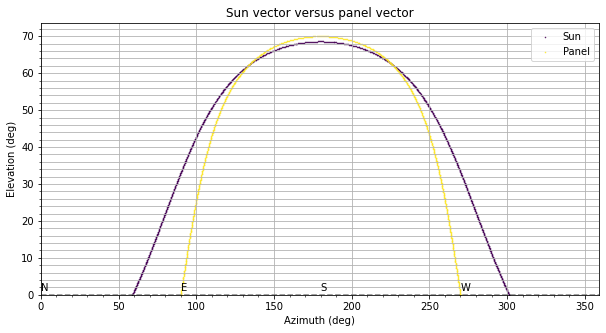

In [25]:
# SOLUTION

beta_ax = 20
az_ax = 180

R = R_opt(beta_ax,az_ax,Wjun[:,1][Wjun[:,1]>0],Wjun[:,0][Wjun[:,1]>0])
s_beta = surface_beta(R,beta_ax)
s_az = surface_azimuth(R,s_beta,az_ax)

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,2)))

plt.figure(figsize=[10,5])
plt.scatter(Wjun[:,0],Wjun[:,1], marker= '.',s = 1,label='Sun')
plt.scatter(s_az,90-s_beta, marker= '.',s = 1,label='Panel')
plt.text(0,1,"N")
plt.text(90,1,"E")
plt.text(180,1,"S")
plt.text(270,1,"W")
plt.xlim(0,359)
plt.ylim(0,np.max(Wjun[:,1])+5) # remove values below zero (only sunrise to sunset)
# plot horizon
plt.hlines(y=0,xmin=0,xmax=359,linestyle='--',color='gray')
plt.minorticks_on()
plt.grid(which='both',axis='y')
plt.grid(which='major',axis='x')
plt.xlabel('Azimuth (deg)')
plt.ylabel('Elevation (deg)')
plt.title('Sun vector versus panel vector')
plt.legend()
plt.show()

## [3 Marks] Plot the percent loss in energy due to misalignment for fixed and single axis cases over time for June 1st
- During daylight hours

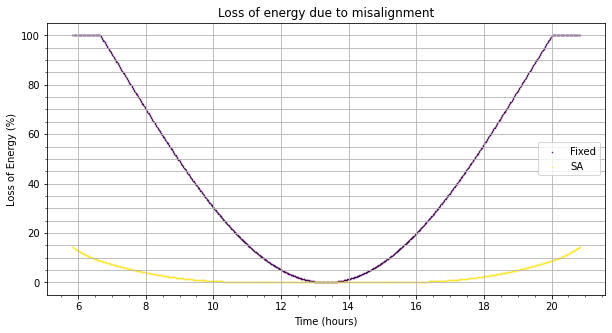

In [26]:
# SOLUTION 

inc = inc_SA(R, beta_ax, az_ax, Wjun[:,1][Wjun[:,1]>0], Wjun[:,0][Wjun[:,1]>0])
loss_fixed = 1 - cos_theta
loss_sa = 1-np.cos(np.radians(inc))
plt.figure(figsize=[10,5])
plt.scatter(time[Wjun[:,1]>0],loss_fixed[Wjun[:,1]>0]*100, marker= '.',s = 1,label='Fixed')
plt.scatter(time[Wjun[:,1]>0],loss_sa*100, marker= '.',s = 1,label='SA')
plt.minorticks_on()
plt.grid(which='both',axis='y')
plt.grid(which='major',axis='x')
plt.xlabel('Time (hours)')
plt.ylabel('Loss of Energy (%)')
plt.title('Loss of energy due to misalignment')
plt.legend()
plt.show()

# BONUS

## [3 Marks bonus] Implement a function that finds the optimal period of rotational adjustment given panel size and motor power consumption.

How often, in minutes, will the panel rotate? 
- Use the June 1st solar data
- Assume a speed of rotation of 1 second per adjustment
- Use the panel size specified in *Section 3.2* and a motor power of 1.5 Watts
- Let the period of adjustment be constant over the day

### Notes on Bonus Question 

The baseline energy on June 1st in Waterloo (25cm$^2$ panel) with continuous adjustment, not accounting for powering the motor is: 

In [27]:
el = Wjun[:,1]
str(np.round(np.trapz(current(Wjun[:,1],1802)*5/1000,dx = 1/60),2)) + ' Watts over ' + \
    str(np.round(el[el>0].shape[0]/60,1)) + ' daylight hours.'

'431.43 Watts over 15.0 daylight hours.'

The energy expended powering the motor as a function of adjustment period is: 

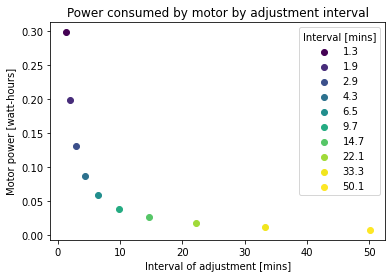

In [28]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,6)))

per = np.logspace(0.1,1.7,10)
adj = [int(el[el>0].shape[0] / p) for p in per]
m_pow = np.array(adj)*1.5/3600 # n_adj * power / time_per_adj [watt-hours]
for m,p in zip(m_pow,per):
    plt.scatter(p,m,label=round(p,1))
plt.legend(title='Interval [mins]')
plt.title('Power consumed by motor by adjustment interval')
plt.ylabel('Motor power [watt-hours]')
plt.xlabel('Interval of adjustment [mins]')
plt.show()

In [46]:
# SOLUTION 

def power(el, az, area, period, motor_power, ret_error = False):

    beta_ax = 20
    az_ax = 180

    # time vector 
    time = np.repeat(np.arange(0,24),60) + np.tile(np.arange(0,60),24)*1/60
    
    # daylight data only
    time = time[el>0]
    az = az[el > 0]
    el = el[el > 0]

    # create the discrete time vector with spacing of period (mins)
    # the vector is centred around solar noon (middle of daylight)
    tx1 = np.arange(time[int(time.shape[0]/2)],0, -period/60)
    tx2 = np.arange(time[int(time.shape[0]/2)],time[-1], period/60)
    tx = np.append(np.flip(tx1[1:]),tx2)
    
    # obtain indices in same way
    idx1 = np.arange(int(time.shape[0]/2),0, -period)
    idx2 = np.arange(int(time.shape[0]/2),time.shape[0], period)

    #Ewe will use this index vector to discretize the Rotation array
    idx1 = idx1[1:].repeat(period)[:int(time.shape[0]/2 - period)]
    idx2 = idx2.repeat(period)[:int(time.shape[0]/2)]
    idx = np.append(np.flip(idx1),idx2)
    
    # might need to pad the beginning and the end so idx is the correct size
    pad = (time.shape[0] - idx.shape[0])/2
    if pad > 0:
        idx = np.pad(idx,int(pad),mode = 'edge')
    if pad%2 > 0:
        idx = np.append(idx,idx[-1])

    R = R_opt(beta_ax,az_ax,el,az)
    
    # down-sample the rotation angle by the period
    Rd = R[idx][:el.shape[0]]

    # need power generation over the day
    # discreted adjustment
    inc = inc_SA(Rd, beta_ax, az_ax, el, az)
    # continuous adjustment
    inc_ideal = inc_SA(R, beta_ax, az_ax, el, az)

    #calculate loss due to misalignment
    cos_inc = np.cos(np.radians(inc))
    cos_inc_ideal = np.cos(np.radians(inc_ideal))

    # anything less than zero not possible  
    cos_inc[cos_inc<0] = 0

    # power: (current (mA) * volts * 1000) [Watts] * cos(theta)
    power_ideal = current(el,area)*5/1000
    power = power_ideal*cos_inc

    power_harvested = np.trapz(power,dx=1/60) #watt-hours
    
    # number of changes/3600 (hours of movement) * 1.5 watts
    power_expended = tx.shape[0]/3600*motor_power #watt hours 
    
    # objective function
    total = power_harvested - power_expended #watt hours 

    #if we want the data as a function of time (specified in input)
    if ret_error:
        # Loss of power over time due to discrete adjustment interval 
        error = power_ideal*cos_inc_ideal - power
        return error, power_ideal, power, Rd
    else:
        return total

period= np.arange(1,200)#mins
m_power = 24 #Watts
area = 1802 # cm^2 
p = np.array([power(Wjun[:,1],Wjun[:,0],area,x,m_power) for x in period])
print('Ideal interval of adjustment is ' + str(period[p.argmax()]) + ' mins')

Ideal interval of adjustment is 25 mins


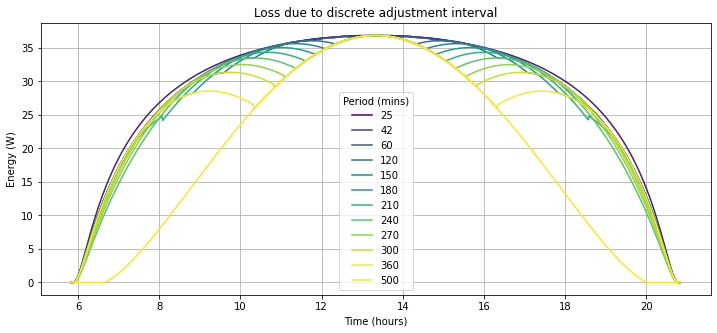

In [49]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,4.5)))
plt.figure(figsize=[12,5])
time = np.arange(0,1440)/60
for t in [25, 42, 60, 120, 150, 180, 210, 240, 270, 300,360,500]:
    err, power_ideal, power_true,Rd = power(Wjun[:,1],Wjun[:,0],area,t,m_power,ret_error = True)
    if t == 42:
        plt.plot(time[Wjun[:,1]>0],power_ideal)
    plt.plot(time[Wjun[:,1]>0],power_true, label=str(t))
plt.xlabel('Time (hours)')
plt.ylabel('Energy (W)')
plt.title('Loss due to discrete adjustment interval')
plt.legend(title='Period (mins)')
plt.grid()
plt.show()

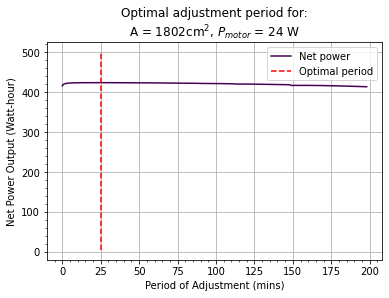

In [55]:
# plt.hlines(y = 6, xmin=0,xmax=200,label='Ideal Power',color='b') 
plt.plot(p,label='Net power')
plt.xlabel('Period of Adjustment (mins)')
plt.ylabel('Net Power Output (Watt-hour)')
plt.vlines(x=25,ymax=500,ymin=5,color='red',linestyles='--',label='Optimal period')
plt.title('Optimal adjustment period for:\nA = 1802cm$^2$, $P_{motor}$ = 24 W')
plt.legend()
plt.minorticks_on()
plt.grid()
plt.show()

### References
[1] https://www.kaggle.com/code/benwatson/sun-position-function/script

[2] Meinel, Aden B., and Marjorie P. Meinel. "Applied solar energy: an introduction." Addison-Wesley Publishing Company, 1976.

[3] Marion, William F., and Aron P. Dobos, National Renewable Energy Laboratory. "Rotation angle for the optimum tracking of one-axis rrackers." Technical Report. July 2013. https://www.nrel.gov/docs/fy13osti/58891.pdf